#**Correlação e Regressão (Parte 1)**



```
(*) Adaptado de material preparado pelo Prof. Wagner Tanaka
```


Neste caderno vamos a explorar aspéctos de correlação e regressão em dados.

Analisar aspéctos de **"causa e dependência"** entre variáveis observadas é inerente à prática da ciência. A a computação pode ajudar bastante com isso. Em resumo:

* Correlação: resume o grau de relacionamento entre duas variáveis (X e Y, por exemplo). 
* Regressão: tem como resultado uma equação matemática que descreve o relacionamento entre variáveis.

É importante destacar que **correlação não necessariamente implica em causalidade**.


## Base de dados de Notas e Faltas

Antes de conhecer as funções da linguagem python para apoiar os cálculos e análises de correlação e regressão precisamos carregar e explorar a base de dados que vamos utilizar para os cálculos.

As instruções a seguir carregam uma base de dados de ESTUDANTES contendo duas  informações: Notas e Faltas.

In [1]:
#https://drive.google.com/file/d/1tUCrugG4okAM9x5oRMDskqMxlDbblFEF/view?usp=sharing
import pandas as pd 
codigo = "1tUCrugG4okAM9x5oRMDskqMxlDbblFEF"
file = "https://drive.google.com/u/3/uc?id=" + codigo + "&export=download"
# Note a especificação de SEPARADOR (ponto e vírgula)
# Note a especificação de VÍRGULA DECIMAL
alunos = pd.read_csv(file, sep = ";",decimal=",")
alunos

,Faltas,Notas
0,8,7.8
1,2,9.2
2,5,9.0
3,12,5.8
4,15,4.3
5,9,7.4
6,6,8.1


`info()` e `describe()` podem ser utilizados para explorar os dados. Note que esta tabela contém apenas 7 linhas.

In [2]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Faltas  7 non-null      int64  
 1   Notas   7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


In [3]:
alunos.describe()

,Faltas,Notas
count,7.000000,7.000000
mean,8.142857,7.371429
std,4.375255,1.761358
min,2.000000,4.300000
25%,5.500000,6.600000
50%,8.000000,7.800000
75%,10.500000,8.550000
max,15.000000,9.200000


Analisando a base de dados, pode-se definir que:

1.   `Faltas por Semestre (X)` é a **Variável Independente**, pois o seu valor, em tese, não é influenciado pelo atributo `Nota Final (Y)`; 
2.    `Nota Final (Y)` é a **Variável Dependente**, pois pode ser influenciada pela quantidade de `Faltas por Semestre (X)`.

Portanto, a `Nota Final (Y)` é a variável que será prevista.

**[Observação]:** Quando dizemos que, **em tese** o valor de `Faltas` não é influenciado pela `Nota Final` estamos fazendo uma suposição. Um aluno poderia "começar a faltar mais" (abandonar), por obter notas intermediárias baixas. Como a base de dados não possiu as "notas parciais" e nem sabemos como o professor calculou a "Nota Final" só podemos fazer suposições.

### Coeficiente de Correlação e seus significados
A análise de correlação tem como resultado um número entre [-1 e 1], denominado de **COEFICIENTE DE CORRELAÇÃO**  que expressa o grau de relacionamento entre duas variáveis. Quanto mais distante do zero, mas significativa é a correlação, que pode ser **NEGATIVA** ou **POSITIVA**.

A seguir, a interpretação da correlação, independente do sinal (positivo ou negativo)
* 0.00 a 0.19 - Correlação bem fraca.
* 0.20 a 0.39 - Correlação fraca.
* 0.40 a 0.69 - Correlação moderada.
* 0.70 a 0.89 - Correlação forte.
* 0.90 a 1.00 - Correlação muito forte.

## Matriz de Correlação

No Pandas temos a função `corr()` que calcula o índice de correlação entre duas variáveis. A instrução a seguir, calcula a correlação entre todos os atributos da tabela gerando uma matriz de correlações. Como esta tabela possui apenas duas colunas (dois atributos) a matriz é simples, envolvendo apenas uma variável dependente e uma independente.

In [4]:
alunos.corr()

,Faltas,Notas
Faltas,1.000000,-0.974763
Notas,-0.974763,1.000000


## Coeficiente de Correlação entre dois atributos

Podemos também especificar os atributos específicos que desejamos utilizar no cálculo, passando-os como parâmetro conforme abaixo. 

In [5]:
alunos['Faltas'].corr(alunos['Notas'])

-0.9747632142351271

O coeficiente de correlação é **NEGATIVO** e próximo de **-1**. Portanto, os dois atributos **Faltas por Semestre (X)** e **Nota Final (Y)** possuem **FORTE** correlação **NEGATIVA** (acima de 0.89 é considerada FORTE). 

### Gráfico ou Diagrama de Dispersão

Utilizamos a função plot() para plotar um gráfico. 
* O parâmetro kind = 'scatter' indica que o gráfico a ser mostrado é do tipo "dispersão".
* Os parâmetros x e y indicam as variáveis independente e dependente, respectivamente.

No gráfico de dispersão os **pontos** são os dados reais da base de dados.

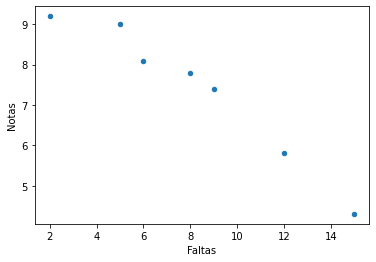

In [ ]:
# x é a variável independente e y a dependente
alunos.plot(x='Faltas', y= 'Notas', kind='scatter')

Para criar um gráfico de dispersão mais elaborado utilizaremos a biblioteca [**Seaborn**](https://seaborn.pydata.org/generated/seaborn.lmplot.html) que oferece diversas opções de gráficos e muitos recursos de customização.

In [6]:
import seaborn as sns 

Utilizamos a função `scatterplot()` para plotar um gráfico de dispersão. 

* Os parâmetros x e y indicam as variáveis independente e dependente, respectivamente.
* No parâmeto `data` especifica-se o nome da tabela (dataframe).

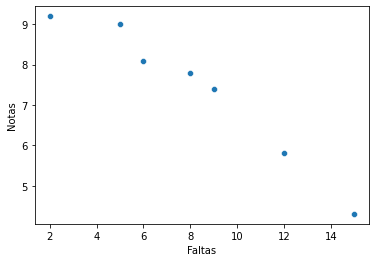

In [ ]:
sns.scatterplot(x='Faltas', y='Notas', data=alunos)

Podemos aprimorar o gráfico de dispersão (com o Seaborn). 

Podemos, por exemplo, traçar uma reta sobre os pontos:
* a função `lmplot()` traça uma reta "sobre os pontos" (aproximação dos pontos);
* fig.set_size_inches define a dimensão da figura (imagem);
* fig.suptitles define um título para o gráfico
* set_xlabels e set_ylabels definem títulos para os respectivos eixos.

[ATENÇÃO]:`lm` em `lmplot` significa `linear model` (modelo linear)

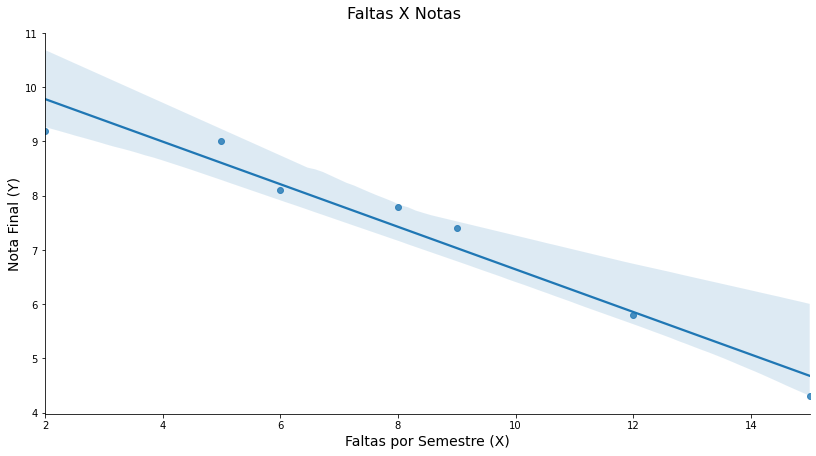

In [ ]:
# graf é o nome da variável que armazena o gráfico (poderíamos usar outro nome de variável) 
graf = sns.lmplot(x="Faltas", y="Notas", data=alunos)
graf.fig.set_size_inches(12,6)
graf.fig.suptitle('Faltas X Notas', fontsize=16, y=1.02)
graf.set_xlabels("Faltas por Semestre (X)", fontsize=14)
graf.set_ylabels("Nota Final (Y)", fontsize=14)

A reta sobre os pontos é a **Reta de Regressão** que ainda será estimada. Veremos como fazer isso mais adiante. 

A reta ajuda a enxergar a correlação no gráfico de dispersão. A partir do gráfico, observa-se a existência de **CORRELAÇÃO NEGATIVA**, pois a medida que a **Nota Final (Y)** **DIMINUI** as **Faltas por Semestre (X)** **AUMENTAM**. Neste caso, a **Nota Final** depende da quantidade de **Faltas por Semestre**.    


O **coeficiente de correlação** e o **gráfico de dispersão** são elementos que conjuntamente ajudam a analisar a relação entre duas variáveis.

É importante destacar que é preciso muito cuidado ao avaliar as correlações. Alguns dados podem indicar uma correlação que não existe de fato, sendo apenas obra do acaso. 

De fato, “correlação não implica causalidade”. O que um alto índice de correlação quer dizer é que "pode ser que a primeira variável cause este comportamento na segunda, que a segunda causa este comportamento na primeira, que ambas causam o comportamento na outra ou isso também pode não dizer nada, como nos casos que mencionamos acima. 

Nas análises e conclusões é sempre importante usar diversas medidas e principalmente conhecer bem os dados.